<a href="https://colab.research.google.com/github/fzambran/EstadisticasCienciaDeDatos/blob/main/est_ds_python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística Inferencial I

**Estadísticas para la Ciencia de Datos con Python**</br>
**Escuela de Informática y Telecomunicaciones**</br>
**Duoc UC**

---

**Video introductorio**


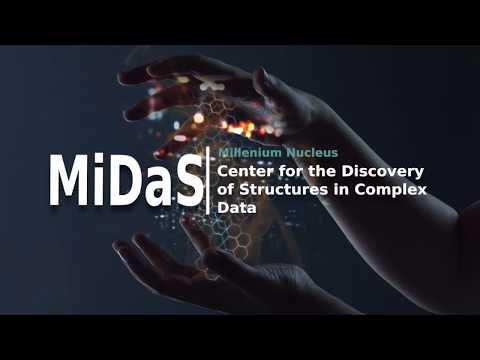

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kyaYehDgdz0', height=380, width=600)

<a id="pearson"></a>
### Coeficiente de correlación lineal de Pearson

<img src="https://i.ibb.co/3MJj71P/cor1.png" width="500">

* Forma parte de un conjunto de múltiples técnicas para medir la asociación entre dos variables
* Es una medida cuantitativa de la fuerza de la relación lineal entre dos variables.
* Su rango de valores posibles es -1 hasta 1, donde valores extremos indican asociación lineal fuerte y valores cercanos a 0 indican asociación lineal debil.
* Su uso es **solo** para medir asociaciones lineales. Para medir asociaciónes no lineales existen otras técnicas como la correlación de *Spearman* o *Kendall*.
* Su fórmula depende de la covarianza entre dos variables, la cuál está dada por la siguiente expresión:
$$
\sigma_{xy} = {1 \over n} \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)
$$
* Con lo anterior, el cálculo de la correlación lineal de Pearson es el siguiente:
$$
\rho_{xy}={\sigma_{xy} \over \sigma_x \sigma_y}
$$
* En `pandas`, podemos usar el método `corr` para calcular la correlación lineal entre variables numéricas de un `DataFrame`.
  
<img src="https://i.ibb.co/VtJNs2S/cor2.png" width="500">

In [ ]:
!mkdir data
!wget https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/StudentsPerformance.csv
!mv StudentsPerformance.csv data/

--2023-10-18 21:11:18--  https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72036 (70K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  70.35K  --.-KB/s    in 0.01s   

2023-10-18 21:11:18 (6.34 MB/s) - ‘StudentsPerformance.csv’ saved [72036/72036]



In [ ]:
## Ejemplo:
## Cargar la base de datos "StudentsPerformance.csv" y
## calcular la correlación lineal entre "math score" y "reading score"
import pandas as pd

data = pd.read_csv("data/StudentsPerformance.csv")
print("Primeras observaciones:")
display(data.head())
print("Correlación entre dos variables:")
display(data[["math score", "writing score"]].corr())
# method: "spearman", "kendall"

Primeras observaciones:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Correlación entre dos variables:


,math score,writing score
math score,1.000000,0.802642
writing score,0.802642,1.000000


* Una forma más práctica de ver estos resultados es mediante un mapa de calor.
* Para este fin, usaremos la librería `seaborn`, que nos provee de formas más directas para generar visualizaciones de datos y esta diseñada a partir de `matplotlib`.
* La función `heatmap` de `seaborn` crea un mapa de calor, en esta visualización podemos añadir los valores numéricos de la correlación y establecer los rangos númericos para los colores.

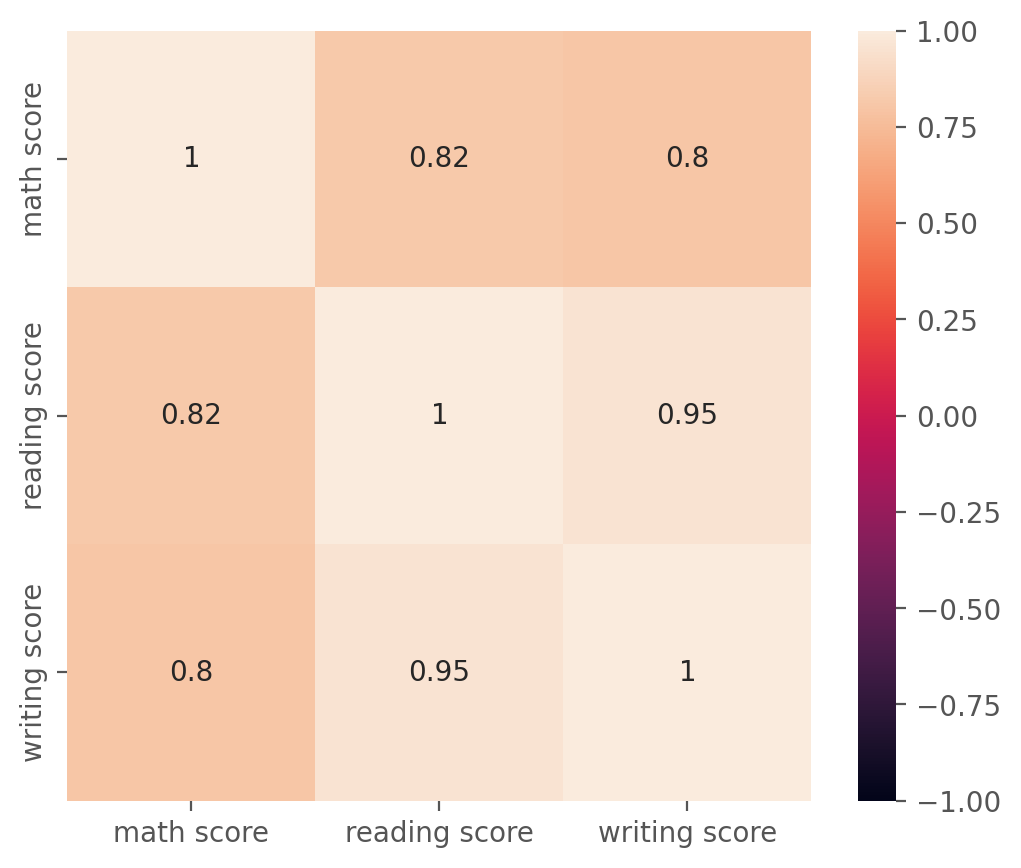

In [ ]:
# Ejemplo:
# Crear un mapa de calor con las correlaciones
# de todas las variables numéricas.
# ¿Cuál es el par de variables con mayor asociación lineal?
import matplotlib.pyplot as plt
import seaborn as sns # convención

plt.rcParams["figure.figsize"] = (6, 5)
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"

correlaciones = data.assign().corr(numeric_only=True)
sns.heatmap(correlaciones, annot=True, vmin=-1, vmax=1);

<a id="ascombe"></a>
### El Cuarteto de Ascombe

* Es un conjunto de datos que mantienen las mismas propiedades estadísticas, o sea que la media, desviación estándar y coeficiente de correlación lineal son bastante similares, pero evidentemente son distintos patrones al inspeccionar los gráficos.
* ¿Qué reflexiones surgen a partir de este conjunto de datos?

In [ ]:
# Mostrar media, varianza y correlación del cuarteto según grupo
import numpy as np

ascombe = pd.read_json("sample_data/anscombe.json")
print("Primeras observaciones:")
display(ascombe.head())
print("Media y varianza por grupo:")
display(ascombe.groupby(["Series"]).agg(["mean", "std"]).round(2))
print("Correlaciones según grupo:")
display(ascombe.groupby(["Series"]).corr().round(2))

Primeras observaciones:


,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


Media y varianza por grupo:


X          Y      
       mean   std mean   std
Series                      
I       9.0  3.32  7.5  2.03
II      9.0  3.32  7.5  2.03
III     9.0  3.32  7.5  2.03
IV      9.0  3.32  7.5  2.03

Correlaciones según grupo:


X     Y
Series              
I      X  1.00  0.82
       Y  0.82  1.00
II     X  1.00  0.82
       Y  0.82  1.00
III    X  1.00  0.82
       Y  0.82  1.00
IV     X  1.00  0.82
       Y  0.82  1.00

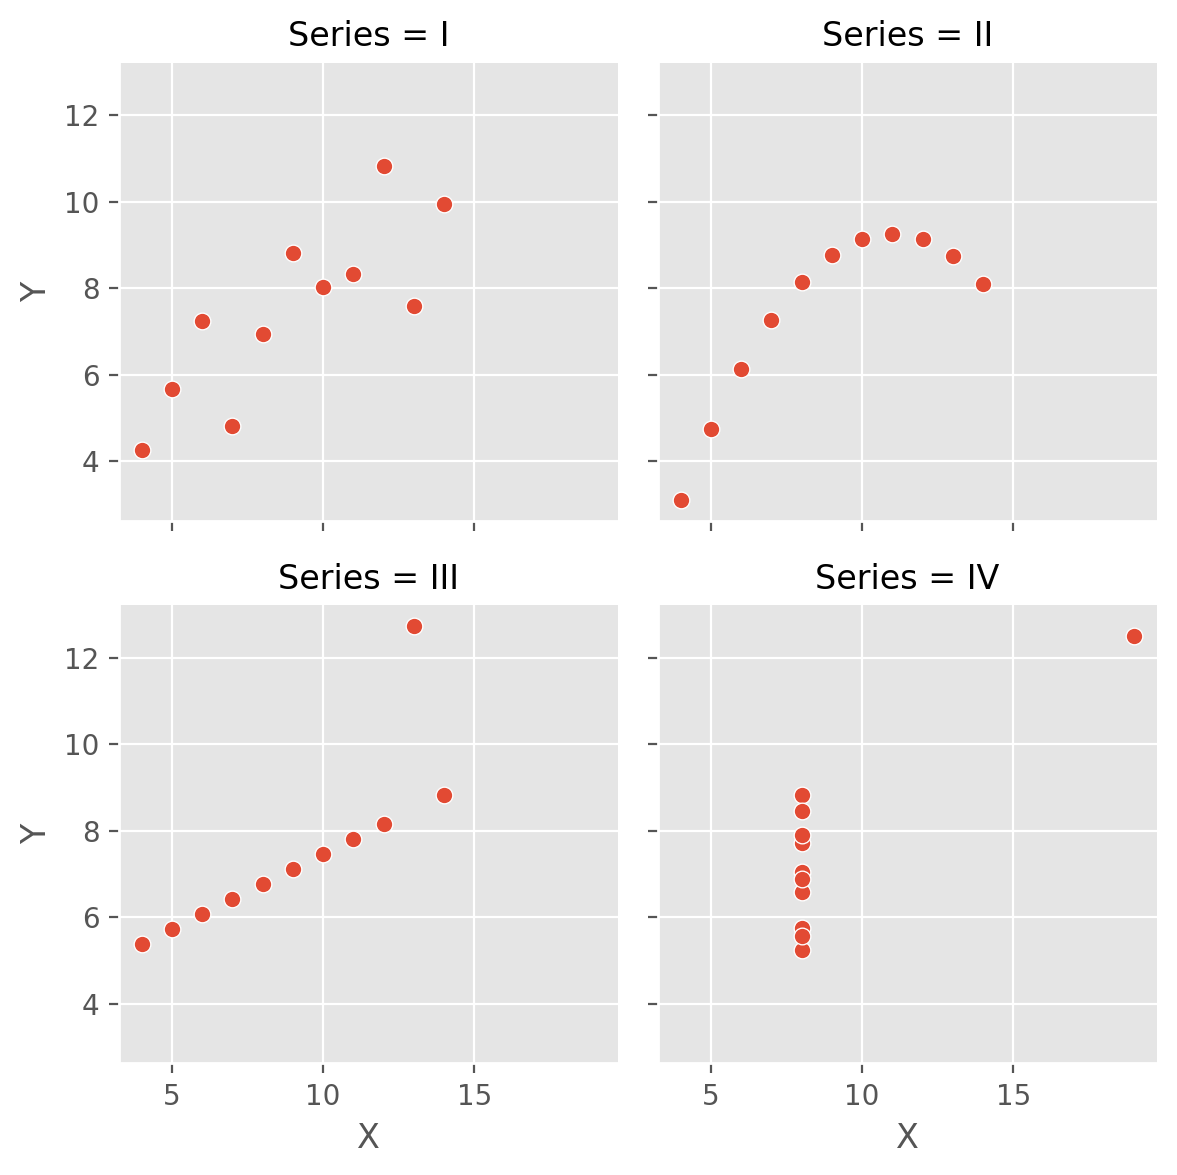

In [ ]:
# Gráfico del cuarteto
sns.relplot(
    data     = ascombe,
    x        = "X",
    y        = "Y",
    col      = "Series",
    col_wrap = 2,
    kind     = "scatter",
    height   = 3
);

<a id="histograma"></a>
### El Histograma

* Su función es mostrar la distribución de una muestra estadística o población respecto a una variable cuantitativa continua.
* Esta compuesto de barras acopladas, debido a la representación continua subyacente. La altura de las barras está dada por la **frecuencia absoluta** o **frecuencia relativa**.
* Para construir un histograma debemos seguir los siguientes pasos:
1. Ordenar los datos de menor a mayor.
2. A partir de estos, crear grupos con intervalos del mismo ancho. Existen distintos criterios para decidir la cantidad de grupos, como la regla de *Sturges*: $\lceil 1+\log_2n \rceil$.
3. Calcular el número de observaciones pertenenciantes a cada grupo.
4. Crear un gráfico de barras, donde se muestre la frecuencia absoluta o relativa de cada grupo. Las barras **deben** estar apiladas.


Regla de Sturges: 11.0


interactive(children=(IntSlider(value=22, description='grupos', max=40, min=4), Checkbox(value=False, descript…

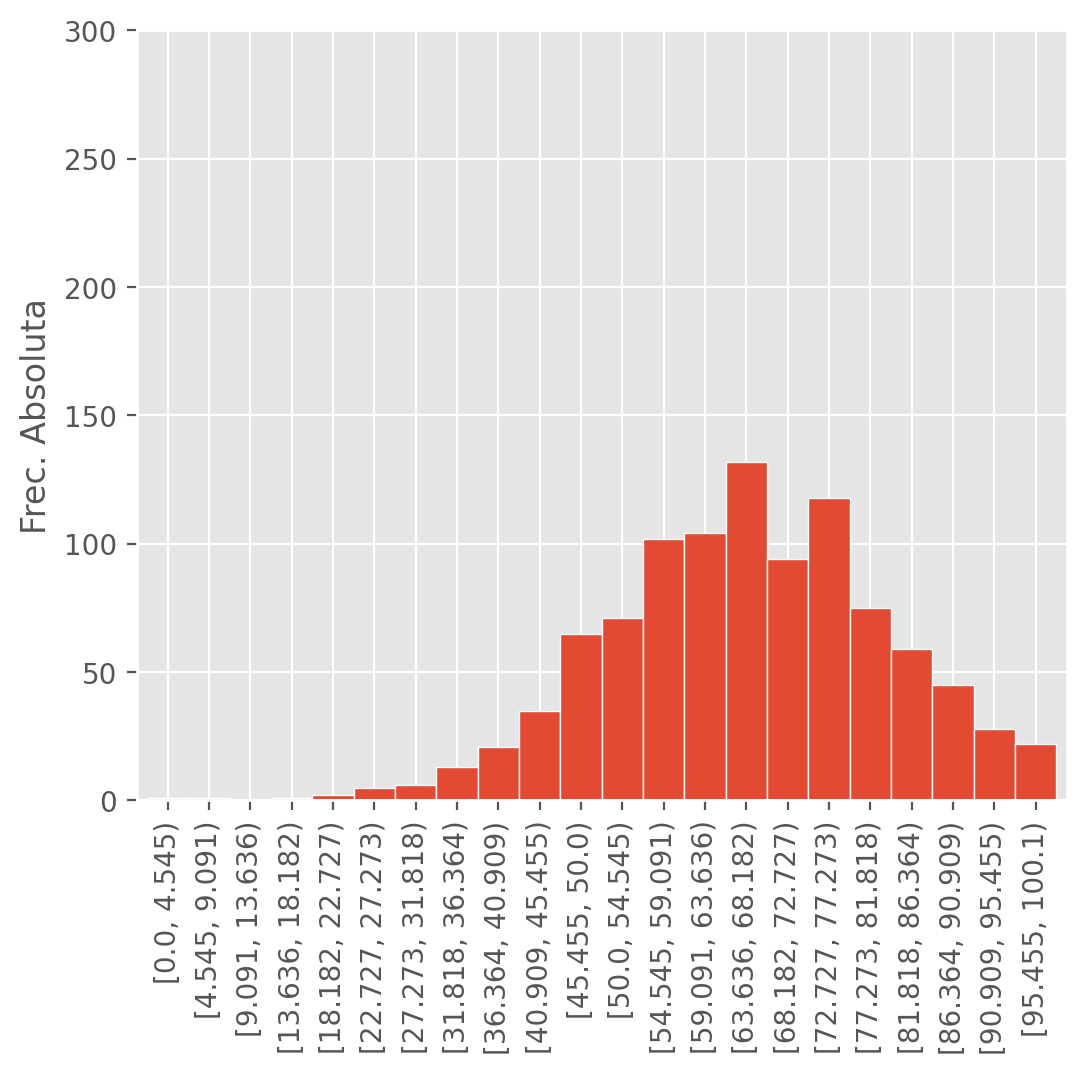

In [ ]:
from ipywidgets import interactive

n = data.shape[0]
print("Regla de Sturges:", np.ceil(1 + np.log2(n)))

def histograma(grupos, pct):
  intervalos = pd.cut(data["math score"], bins=grupos, right=False)
  frecuencias = intervalos.value_counts(pct).sort_index()
  frecuencias.plot(kind="bar", edgecolor="white", width=1)
  etiqueta_y = "Frec. Relativa" if pct else "Frec. Absoluta"
  plt.ylabel(etiqueta_y)
  altura_y = 0.6 if pct else 300
  plt.ylim(0, altura_y);

interactive(histograma, grupos=(4, 40, 1), pct=False)

* Con el método `plot` y fijando `kind="hist"` realizamos un histograma. Podemos establecer el número de grupos con el parámetro `bins`.
* Además, la función `sns.pairplot` realiza un gráfico donde se muestra la relación de a pares en variables cuantitativas, en su diagonal se exhibe el histograma de cada variable. Esto es útil para realizar análisis inicial de los datos.

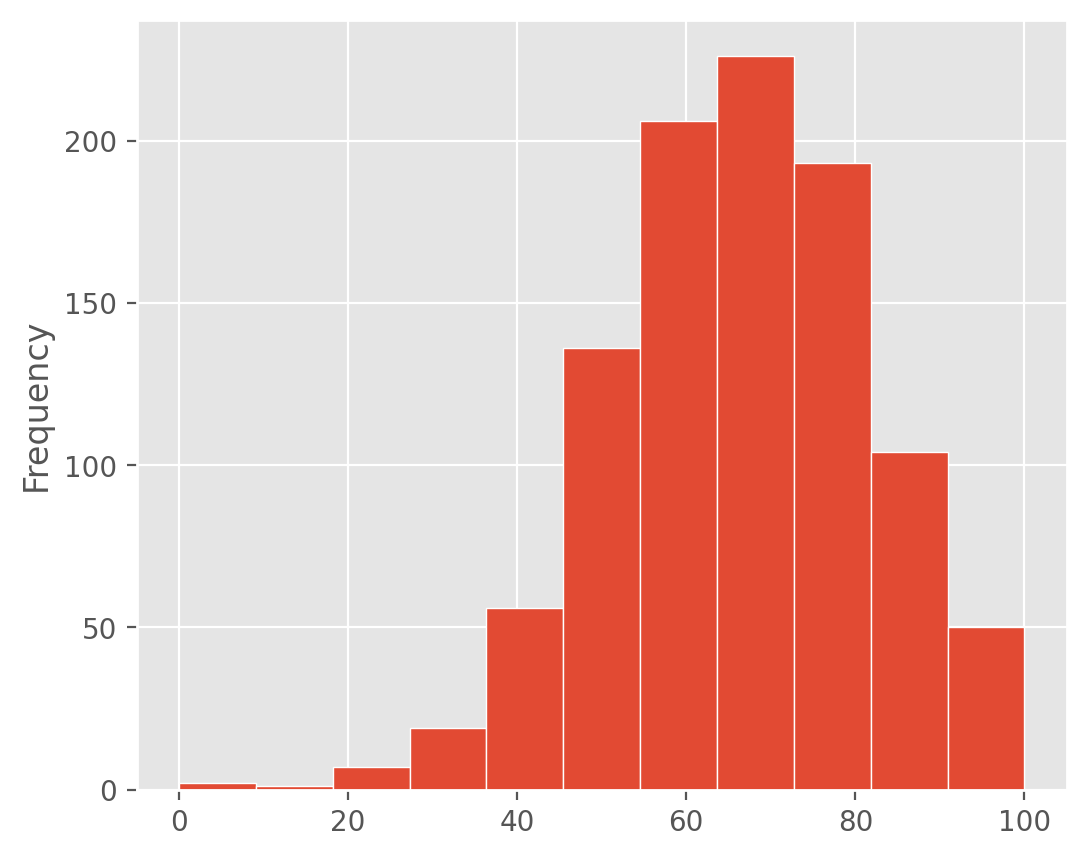

In [ ]:
# Ejemplo de histograma para la variable "math score" con 11 intervalos.
data["math score"].plot(kind="hist", bins=11, edgecolor="white");

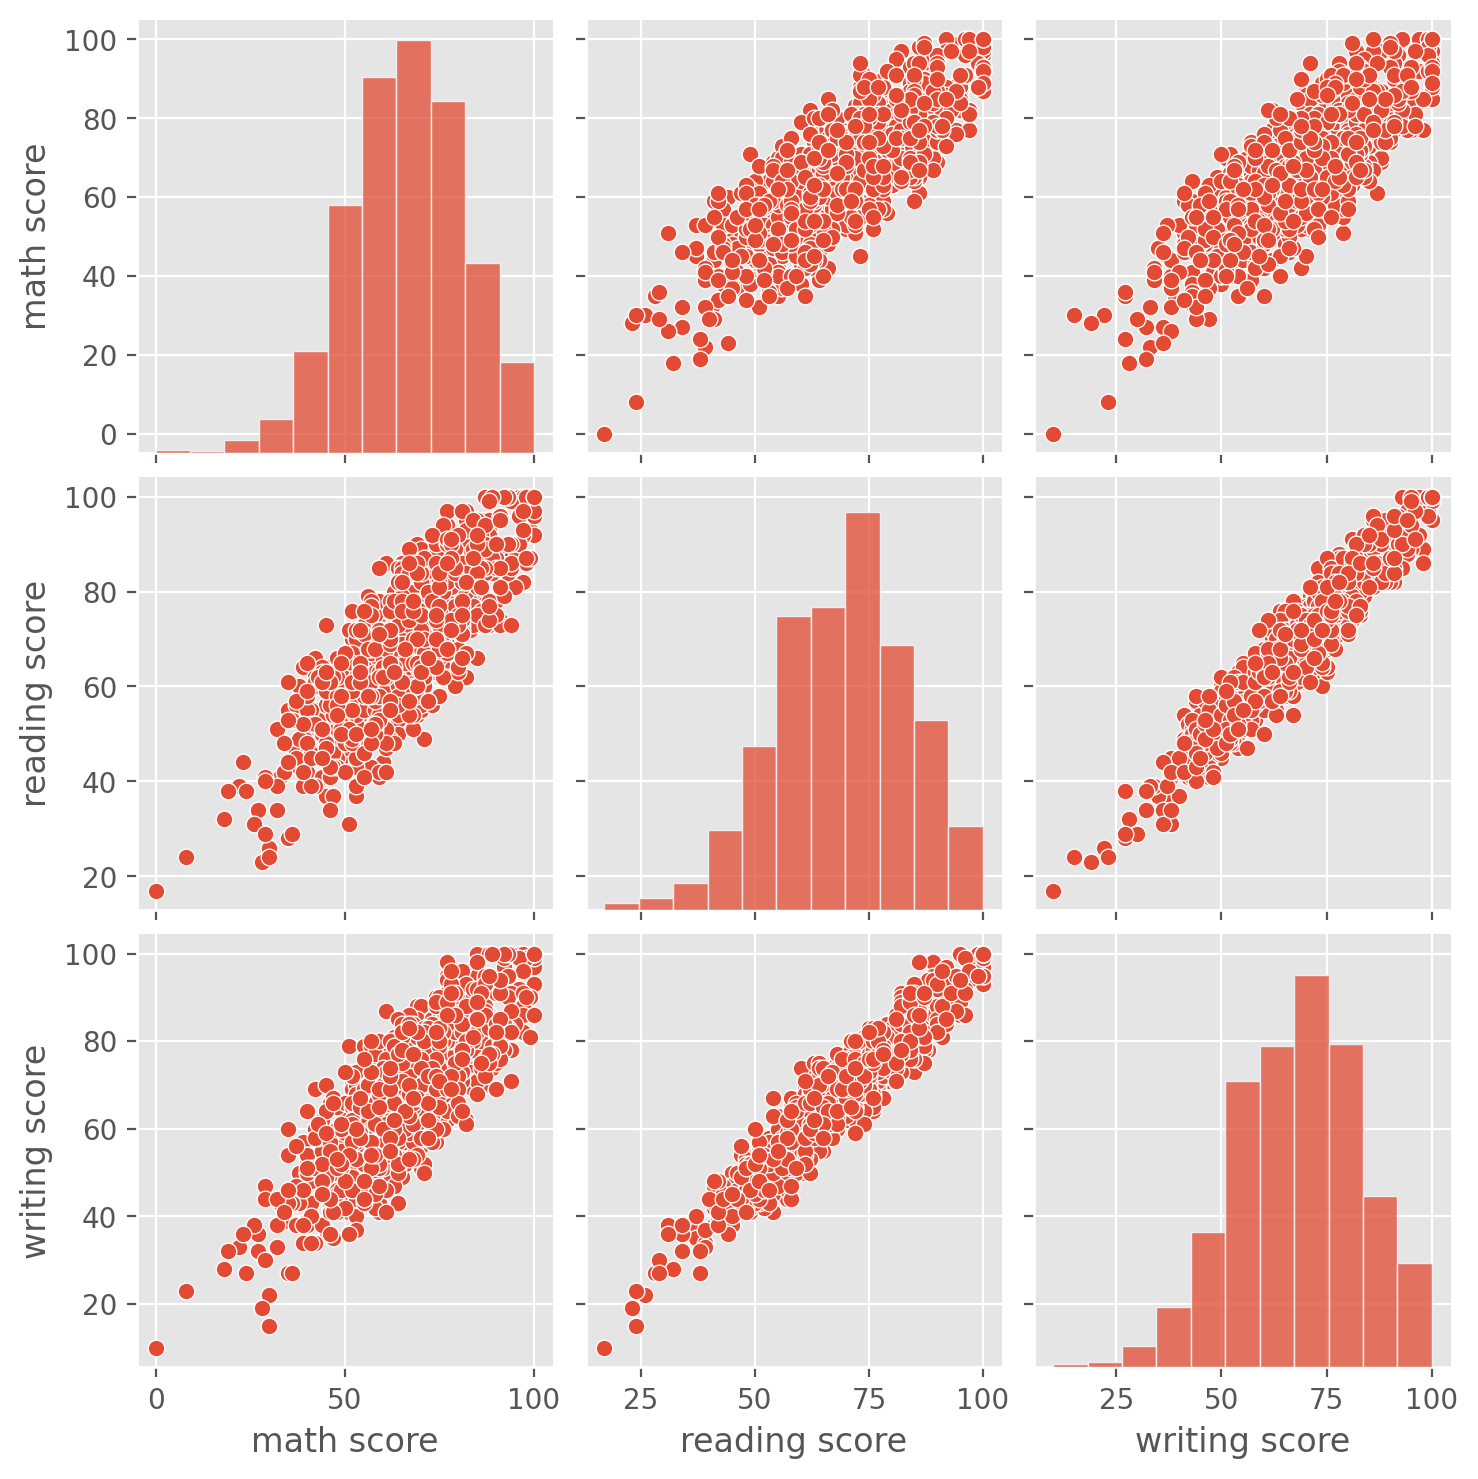

In [ ]:
# Ejemplo de relaciones a pares para las variables cuantitativas
sns.pairplot(data, diag_kws={"bins": 11});

<a id="mas"></a>
### Muestreo Aleatorio Simple

* Uno de las bases de la estadística es que usalmente no contamos con los datos totales de la población, sino que una muestra de determinado tamaño, bastante inferior a esta.
* Sin embargo, existe la posibilidad de que la muestra que seleccionemos no contenga las características que tiene la población en general, por lo que hay varias consideraciones para que al momento de seleccionar una muestra, esta sea representativa.
* El **muestreo aleatorio simple** es donde cada una de las muestras posibles de $k$ individuos tiene la misma probabilidad de ser escogida. El método `sample` disponible en `Series` y `DataFrame`s permite realizar este tipo de muestreo, al cual debemos indicar el tamaño de muestra.
* La función `np.random.seed` asegura que a **todos** nos den las mismas muestras, con el fin de replicar los resultados obtenidos. Este concepto se llama **reproducibilidad**.
* Es importante destacar que en la gran mayoría de los casos no conocemos las características de la población, por lo que con herramientas estadísticas buscamos estimar el comportamiento de esta a través de una muestra. Esto nos introduce al concepto de **incertidumbre** presente en los datos.

In [ ]:
# Ejemplo: realice 15 muestreos de 100 individuos respecto a la
# variable "math score", a cada una de las muestras calcule la
# media y desviación estándar ¿Que diferencias nota respecto a
# los resultados sobre el total?

muestras = 15
tamanio  = 100

medias    = []
desv_ests = []

for num in range(muestras):
  np.random.seed(num) # para que a todos nos dé igual
  muestra  = data["math score"].sample(tamanio)
  media    = muestra.mean()
  desv_est = muestra.std()

  medias.append(media)
  desv_ests.append(desv_est)

print("media pobl.:", data["math score"].mean())
print("desv. est. pobl.:", data["math score"].std())

print("medias:", medias)
print("desviaciones estándar:", desv_ests)

media pobl.: 66.089
desv. est. pobl.: 15.16308009600945
medias: [65.34, 64.18, 66.62, 66.64, 65.52, 65.17, 64.14, 67.69, 65.63, 65.36, 69.34, 68.38, 65.5, 66.6, 67.58]
desviaciones estándar: [14.427961068912705, 15.21321860100683, 14.134834111284622, 13.72494595304992, 15.315853013637652, 15.265366492207583, 16.159570451336794, 13.97378136570648, 12.824892934753054, 14.997319625839676, 14.165843113317015, 13.51824804858345, 13.920045860832383, 16.33426095077708, 14.593605905783992]


<a id="epdn"></a>
### Estadística Paramétrica y Distribución Normal

* En muchas ocaciones, se logra describir de buena forma el comportamiento de un fenómeno solo a través de **parámetros**, los cuales forman parte de una distribución estadística. Esta área de la estadística que busca describir los fénomenos mediante parámetros se conoce como **Estadística Paramétrica**.
* Una distribución en estadística, nos indica la probabilidad de ocurrencia de determinados eventos. Existen distribuciones ampliamente estudiadas que cuentan con características que ayudan a comprender fenómenos de mejor manera. Una de ellas es la **distribución normal**.
* La distribución normal, puede indicarnos el comportamiento de un fenómeno de interés solo con la **media** y **desviación estándar**, y adquiere la forma de **la campana de gauss**.
* *Características de la distribución normal*:
  * Es simétrica
  * Su media y mediana coinciden.
  * Los valores más cercanos a la media son los de mayor probabilidad de ocurrencia.
* Ejemplos de fenómenos que siguen una *distribución normal*: talla de calzado en hombres o mujeres, peso de bebes al momento de nacer, puntaje SIMCE, puntaje PAES, etc.
* Diferencia importante:
  * **Estadístico**: es un valor que se obtiene a partir de una **muestra**.
  * **Parámetro**: es un valor que se obtiene a partir de la **población**.

interactive(children=(IntSlider(value=0, description='media', max=10, min=-10), FloatSlider(value=2.05, descri…

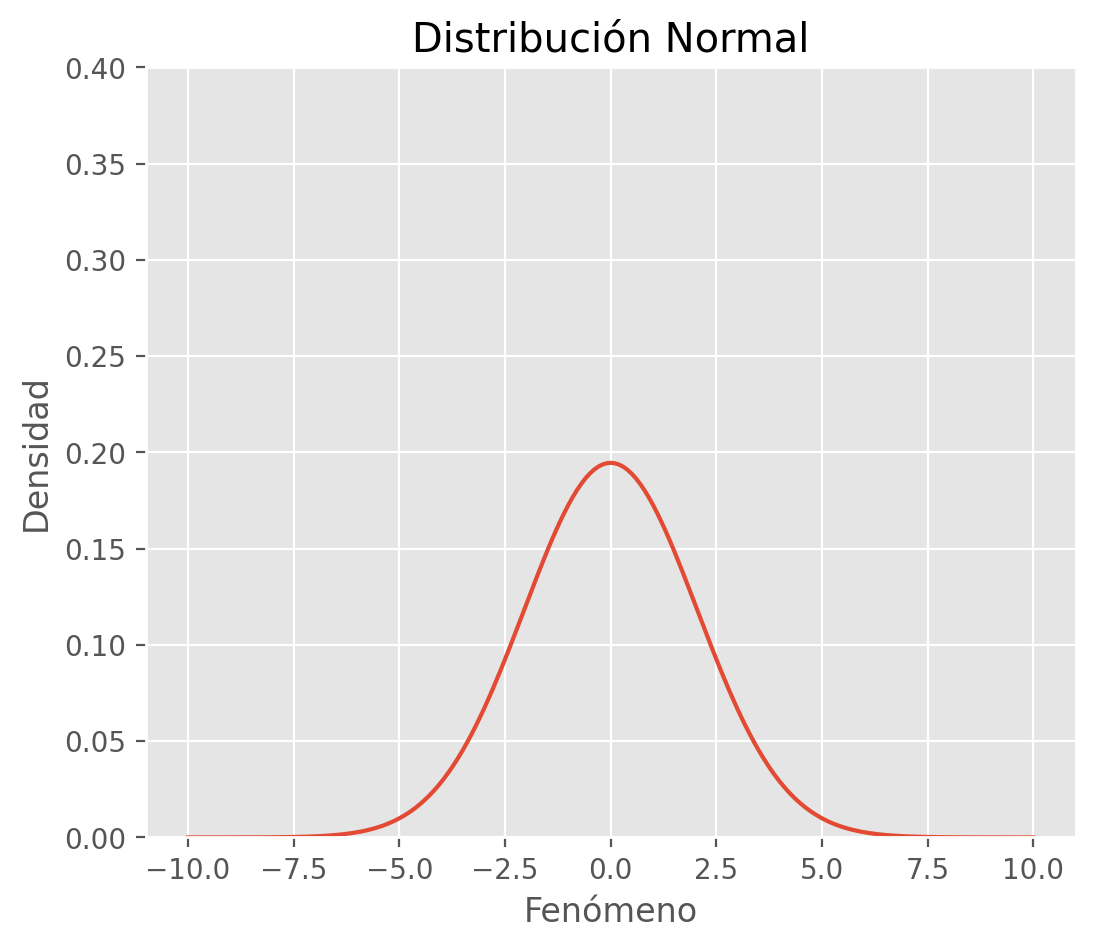

In [ ]:
from scipy.stats import norm
import numpy as np

def grafico_normal(media, desv_est):
  f = norm(loc=media, scale=desv_est)
  x = [valor / 10 for valor in range(-100, 101)]
  y = f.pdf(x)
  plt.plot(x, y)
  plt.ylim(0, 0.4)
  plt.xlabel("Fenómeno")
  plt.ylabel("Densidad")
  plt.title("Distribución Normal")

interactive(grafico_normal, media=(-10, 10), desv_est=(0.1, 4))

* Cuando la población de la que provienen nuestra variable sigue una distribución normal, contamos con un interesante set de herramientas como el **margen de error** y **test de hipótesis para la media**.
* Debemos ser cuidadosos al momento de decidir si es apropiado asumir características de una *distribución normal* sobre nuestros datos, pues si no lo es, nuestros resultados serán **completamente erróneos**.
* Sin embargo, el **Teorema Central del Límite** nos garantiza que si el tamaño de la muestra es suficientemente grande, las conclusiones que obtengamos asumiento distribución normal serán "aproximadamente correctas".
* No existe un concenso respecto al significado de "suficientemente grande", este concepto varia según el contexto.

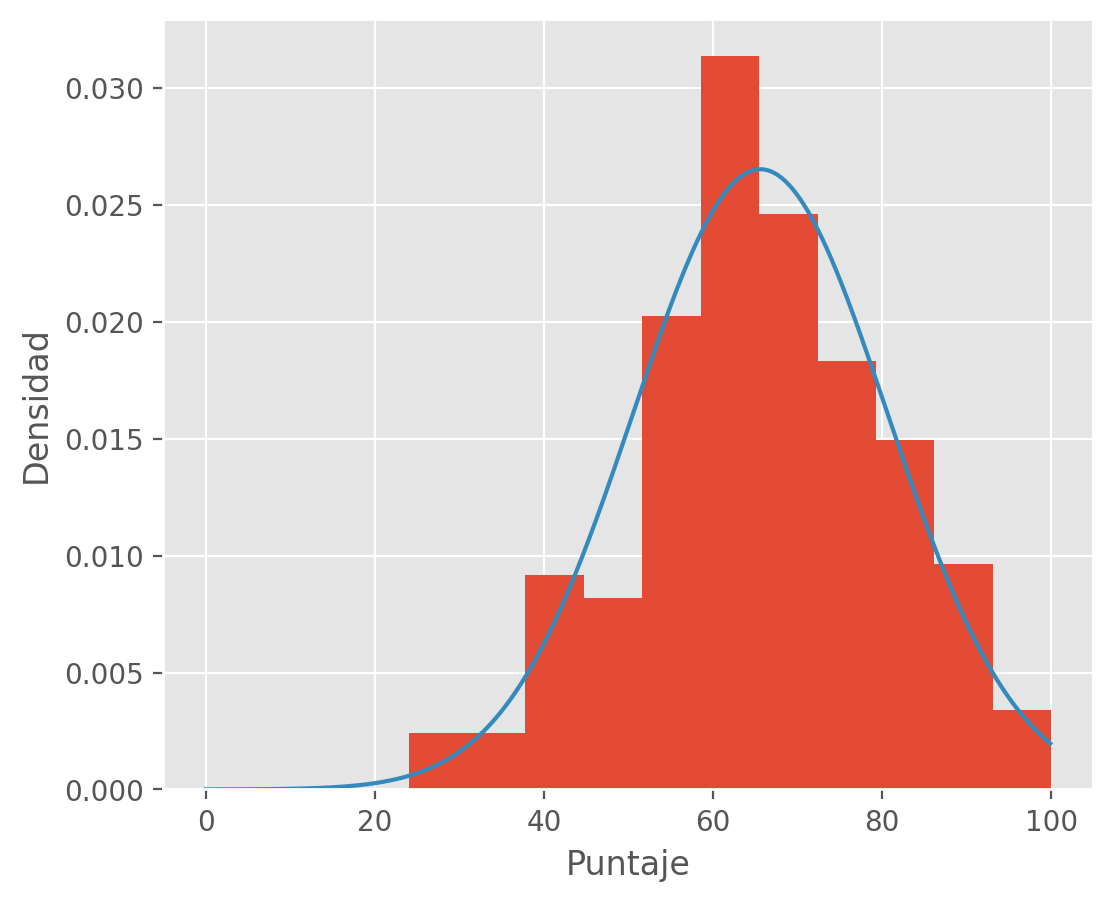

In [ ]:
# Ejemplo: Obtener una muestra de tamaño 300 de "math score"
# Ejemplo: añadir curva de distribución normal al histograma anterior
# Considerar media y desviación estándar proveniente de la población
np.random.seed(2023) # reproducibilidad
muestra = data["math score"].sample(300)
media = muestra.mean()
desv_est = muestra.std()

x = [valor / 10 for valor in range(0, 1000)]
y = norm(loc=media, scale=desv_est).pdf(x)

fig, ax = plt.subplots()
# densidad: area bajo la curva debe dar 1
# en histograma: suma de areas de las barras debe dar 1
plt.hist(muestra, bins=11, density=True);
ax.plot(x, y)
plt.xlabel("Puntaje")
plt.ylabel("Densidad");

* Una de los supuestos detrás de la estadística clásica, es que tendremos la posibilidad de repetir nuestros experimentos en el futuro.
* Si bien existen definiciones más teóricas, esto nos abre el paso a la definición de **intervalo de confianza**. Este nos indica entre que valores está el parámetro con cierta precisión o **nivel de confianza**.
* El nivel de confianza es la probabilidad de que el intervalo contenga el valor real del parámetro en un **futuro experimento**.
* Algunos valores aceptados por la comunidad científica para el nivel de confianza son 90%, 95% y 99%.
* En el caso de la media de la distribución normal, el intervalo de confianza está dado por:
$$
IC=\hat\mu \pm z_{1-\alpha/2}\sqrt{\sigma^2 / n}
$$
Donde $\hat\mu$ es la media muestral, $\sigma^2$ la varianza poblacional, $n$ el tamaño muestral y $z$ el cuantil asociado al nivel de confianza seleccionado en la distribución normal de media 0 y desviación estándar 1.
* Es de esperar que no se cuente con la varianza poblacional, por lo que en estos casos se utiliza la distribución $t$ de Student, la cual es muy similar a la distribución normal, pero depende del tamaño muestral. El intervalo de confianza para la media con la distribución $t$ de Student es:
$$
IC=\hat\mu \pm t_{1-\alpha/2}\sqrt{s^2 / n}
$$
Donde $s^2$ es la varianza muestral y $t$ el cuantil asociado al nivel de confianza seleccionado en la distribución $t$ de Student con $n-1$ grados de libertad.

interactive(children=(IntSlider(value=15, description='grados_libertad', max=30, min=1), Output()), _dom_class…

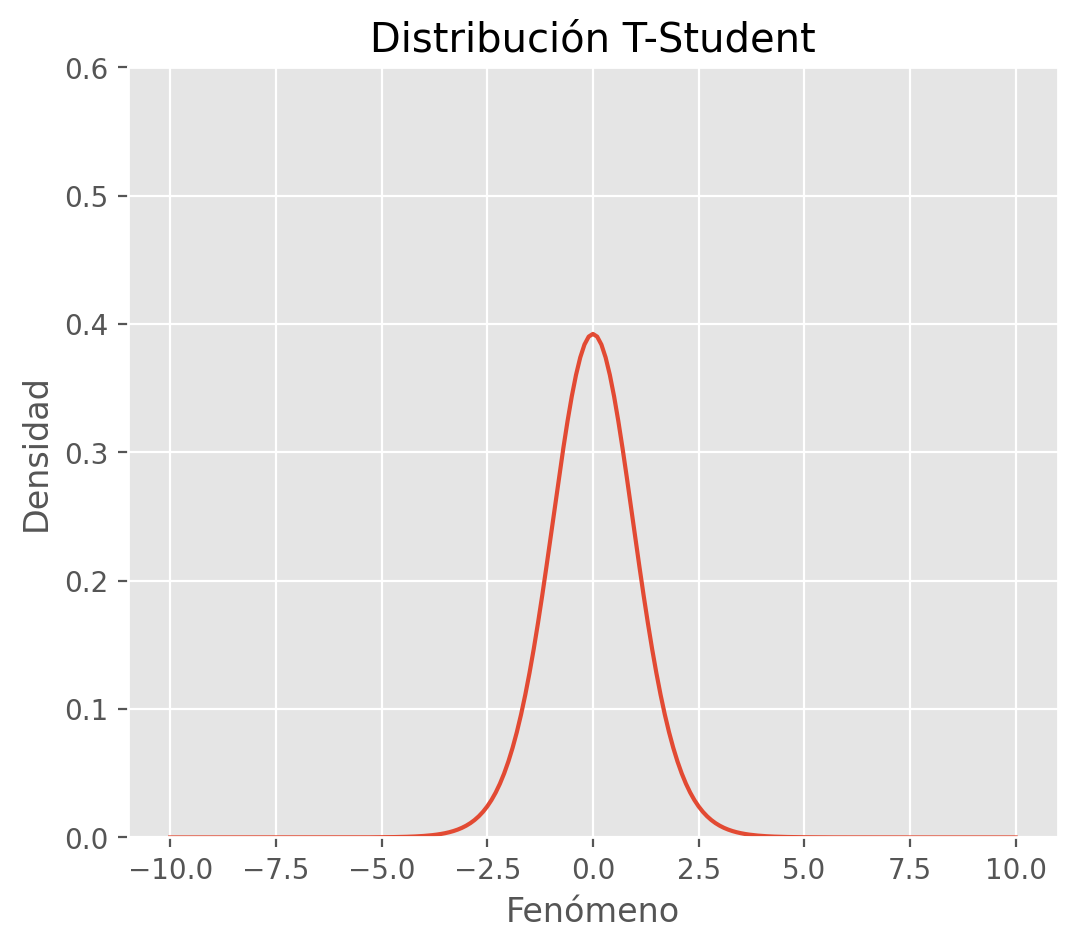

In [ ]:
from scipy.stats import t

def grafico_tstudent(grados_libertad):
  f = t(df=grados_libertad)
  x = [valor / 10 for valor in range(-100, 101)]
  y = f.pdf(x)
  plt.plot(x, y)
  plt.ylim(0, 0.6)
  plt.xlabel("Fenómeno")
  plt.ylabel("Densidad")
  plt.title("Distribución T-Student")

interactive(grafico_tstudent, grados_libertad=(1, 30, 1))

In [ ]:
print("Intervalo de confianza para muestra de \"math score\":")
media_muestra = np.mean(muestra)
var_muestra = np.var(data["math score"])
tamanio = len(muestra)

def ic(nivel_conf):
  alpha = 1 - nivel_conf
  z = t.ppf(1 - alpha / 2, df=tamanio - 1)
  margen_error = z * np.sqrt(var_muestra / tamanio)
  inf = media_muestra - margen_error
  sup = media_muestra + margen_error
  print("Media muestral:", round(media_muestra, 3))
  print("Margen        :", round(margen_error, 3))
  print("IC            :", [round(inf, 3), round(sup, 3)])

interactive(ic, nivel_conf=[0.5, 0.8, 0.9, 0.95, 0.99])

Intervalo de confianza para muestra de "math score":


interactive(children=(Dropdown(description='nivel_conf', options=(0.5, 0.8, 0.9, 0.95, 0.99), value=0.5), Outp…

Intervalo de confianza para 100 muestras:
- media pobl.: 66.09
- desv. est. pobl.: 15.16


interactive(children=(IntSlider(value=500, description='tamanio', max=1000, min=20, step=20), Dropdown(descrip…

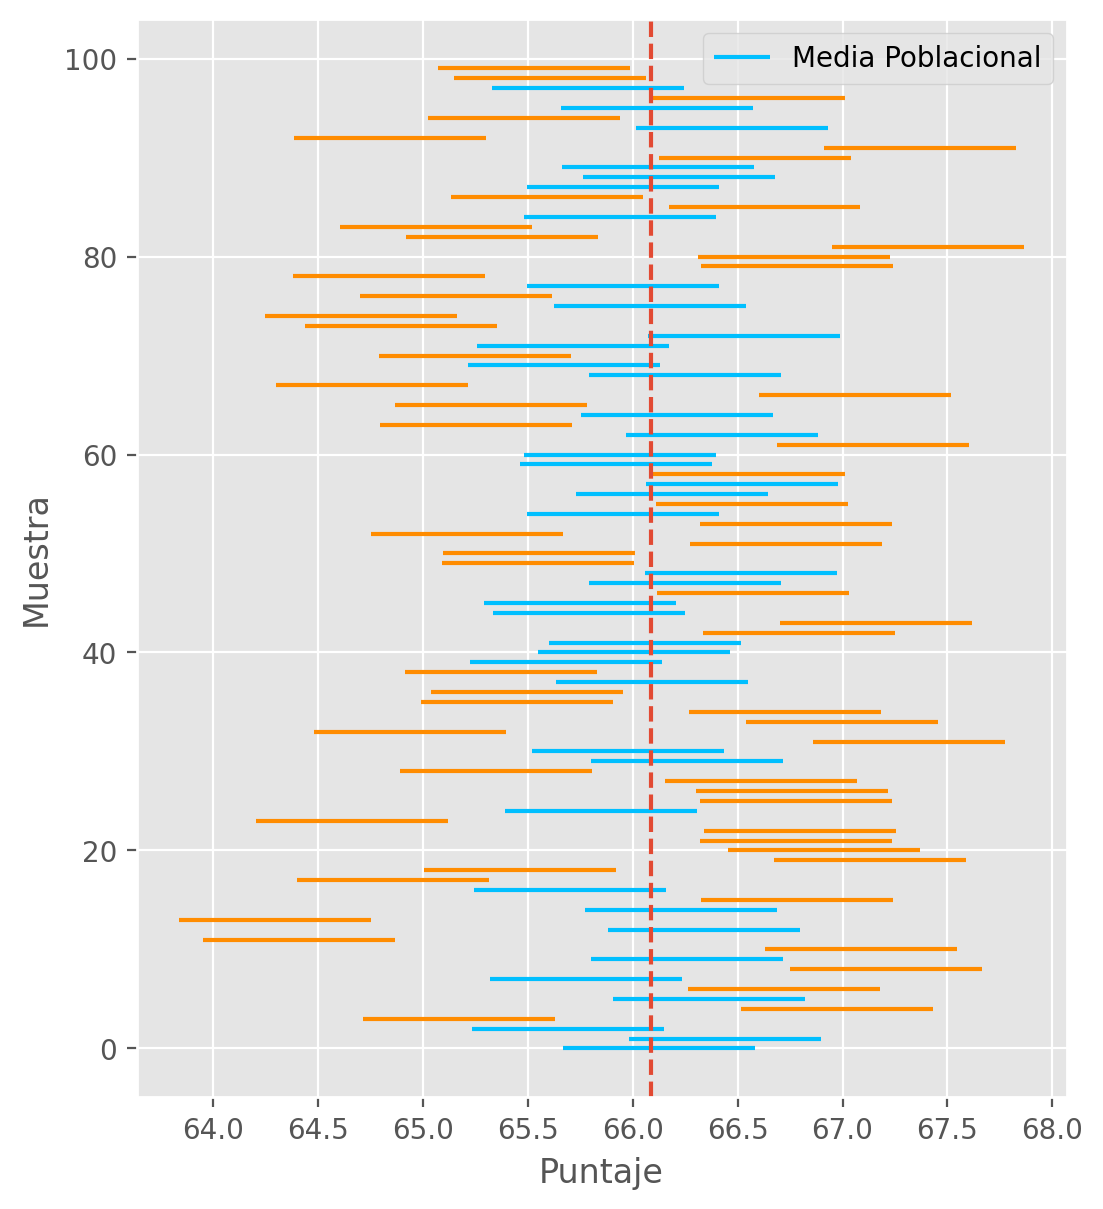

In [ ]:
print("Intervalo de confianza para 100 muestras:")

media = data["math score"].mean()
varianza = data["math score"].var()

print("- media pobl.:", round(media, 2))
print("- desv. est. pobl.:", round(varianza ** 0.5, 2))

plt.rcParams["figure.figsize"] = (6, 7)

def grafico_concuna(tamanio, confianza):
  alpha = 1 - confianza
  z = norm.ppf(1 - alpha / 2)

  ics = []

  for num in range(100):
    np.random.seed(2022 + num)
    muestra = np.random.normal(loc=media, scale=varianza ** 0.5, size=tamanio)
    media_muestra = muestra.mean()
    margen = z * np.sqrt(varianza / tamanio)
    ic = [media_muestra - margen, media_muestra + margen]
    ics.append(ic)

  ics = pd.DataFrame(ics, columns=["low", "upp"])
  condicion = (ics["low"] <= media) & (ics["upp"] >= media)
  ics["color"] = np.where(condicion, "deepskyblue", "darkorange")

  plt.hlines(
      xmin = ics["low"],
      xmax = ics["upp"],
      y = ics.index,
      color = ics["color"]
  )
  plt.axvline(x=media, linestyle="--")
  plt.xlabel("Puntaje")
  plt.ylabel("Muestra")
  plt.legend(["Media Poblacional"])

interactive(
    grafico_concuna,
    tamanio = (20, 1000, 20),
    confianza = [0.5, 0.8, 0.9, 0.95, 0.99]
)


<a id="th"></a>
### Introducción al Test de Hipótesis
* En el comienzo comentamos que las características de una muestra **no necesariamente** son las características poblacionales.
* Para orientar una decisión sobre la población, con datos de una muestra, se utiliza el denominado **Test de Hipótesis**, el cuál se  define como el proceso que permite, mediante una muestra, aceptar o rechazar una suposición  planteada sobre un parámetro desconocido de la población.
* Ejemplos de hipótesis: La media de estatura de los chilenos es 170 cm o el nivel de colesterol de las personas que consumen cierto producto es mayor a $200\ mg/dl$.
* Formalmente se definen dos hipótesis complementarias:
  * **Hipótesis Alternativa** ($H_1$): Es propuesta por el estudio y, por lo tanto, es la hipótesis de trabajo. El trabajo se centrará en buscar evidencias en la muestra que sean sucientes para apoyar esta hipótesis.
  *  **Hipótesis Nula** ($H_0$): Estándar, lo comunmente aceptado, por tanto, se tratará de buscar evidencia suciente para rechazarla, con el objetivo que la reemplace $H_1$.
* En este contexto, se habla del **nivel de significancia** ($\alpha$), el cuál se usa para decidir en cuales casos se debe rechazar $H_0$. Está directamente relaciondo con la probabilidad de rechazar incorrectamente $H_0$.
* De la misma forma, valores para el nivel de significancia aceptables para la comunidad científica son $0.01$, $0.05$ y $0.1$. Se deben establecer **antes** de realizar el test.
* ¿Cómo se puede relacionar el estudio que realizó Wald a los aviones con test de hipótesis?


### La librería ESTYP

* Desarrollada por Esteban Rucán, contiene dentro de sus módulos funciones que permiten realizar test de hipótesis de forma sencilla y amigable.
* Creada en 2023, se encuentra en constante desarrollo y actualización.
* Documentación: <https://estyp.readthedocs.io/en/latest/>
* Las funciones relacionadas a test de hipótesis se encuentran dentro del módulo `testing`.
* Estas funciones son inspiradas a sus análogas en `R`, por lo que la sintaxis es muy similar.
* Para instalarla, debemos ejecutar el siguiente comando en una celda de código:


In [ ]:
%pip install estyp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import estyp
estyp.__version__

'0.9.3'

<a id="ehvp"></a>
### Estadísticos de Hipótesis y valores-p

<img src="https://i.ibb.co/3NCBfTk/valor-p.png" width="500">

* Los valores que exactamente ayudarán a orientar nuestras decisiones y rechazar o no $H_0$, son los **Estadísticos de Hipótesis** y su **valor-p** asociado.
* El estadístico de hipótesis se calcula bajo el supuesto de que la hipótesis nula es correcta y es un valor que servirá como referencia para realizar un determinado cálculo del área bajo la curva, esta área se denomina como **valor-p**.
* Un valor-p mayor al nivel de significancia $\alpha$ implica una **concordancia** entre la hipótesis nula y los datos de la muestra. Por otro lado, un valor-p menor al nivel de significancia implica una **discordancia** entre los datos de la muestra y la hipótesis nula.

<a id="em"></a>
### Estudio de la media poblacional usando una muestra

$$
T = {\bar x - \mu_0 \over s / \sqrt{n}}
$$

* Para este propósito, usamos el test T creado por *Student* (William Sealy Gosset) en 1908.
* Las hipótesis planteadas en este test son:
  * $H_0$: La media poblacional es igual a $\mu_0$.
  * $H_1$: La media poblacional es distinta a $\mu_0$.
* Se encuentra disponible en la función `t_test` de ESTYP, la cual recibe la muestra a usar y $\mu_0$. Entrega entre otras cosas, el estadístico de hipótesis $T$, valor-p y un intervalo de confianza para la media poblacional al $95\%$.
* En el caso de la variable `math score`, ya conocemos el valor de la media poblacional, pero en la realidad es algo que no es usual, por lo que deberemos proponer valores para $\mu_0$ bajo algun criterio o justificación fundada. Ejemplo clave: resultados en estudios anteriores de la hipótesis de interés.

In [ ]:
## Ejemplo: estudio de la media poblacional de math score mediante una
## muestra de tamaño 100. Considerar alpha=0.05 ¿rechazamos o no H_0?
from estyp.testing import t_test

mu_0 = 70 # data["math score"].mean()

np.random.seed(2023)
muestra = data["math score"].sample(100)

test = t_test(muestra, mu = mu_0)
print(test)
# hay discordancia entre muestra y H_0, rechazamos H_0
# two-sided: H1: media pobl. != mu_0
# less:    : H1: media pobl. <  mu_0
# greater  : H1: media pobl. >  mu_0


    One Sample t-test
    T = -2.9079 | df = 99 | p-value = 0.0045
    alternative hypothesis: true mean is not equal to 70
    95 percent confidence interval:
     63.304210 68.735790
    sample estimates:
      mean of x: 66.020000
    


Como el $\text{valor-p}=0.0045$, hay una discordancia entre los datos de la muestra y la hipótesis nula, por lo que se rechaza $H_0$. Por lo tanto, hay evidencia estadística hacia que la media de los puntajes de matemáticas es distinta a $70$.

In [ ]:
# Ejemplo 2: Ver como afecta el tamaño de la muestra al valor-p
from ipywidgets import interactive

def test_t(mu_0, n, alternative):
  np.random.seed(2023)
  muestra = data["math score"].sample(n)
  display(t_test(muestra, mu=mu_0, alternative=alternative))

interactive(
    test_t,
    mu_0 = (60, 70, 0.1),
    n    = (25, 1000, 25),
    alternative = ["two-sided", "less", "greater"]
)

interactive(children=(FloatSlider(value=65.0, description='mu_0', max=70.0, min=60.0), IntSlider(value=500, de…

<a id="cm"></a>
### Comparacion de medias poblacionales usando dos muestras

$$
T = {\bar x_A - \bar x_B \over s_p \sqrt{1/n_A + 1/n_B}}
$$


* En este caso, nos interesa estudiar las posibles diferencias a nivel poblacional de las medias de dos variables de carácter independiente (o sea, no hay forma de asociar estas variables).
* También se realiza con el test T de *Student* y la función `t_test` de ESTYP. Se entregan las dos muestras como argumentos.
* La formulación de las hipótesis está dada por:
  * $H_0$: las medias poblacionales son iguales ($\mu_A-\mu_B=0$).
  * $H_1$: las medias poblacionales son distintas ($\mu_A-\mu_B\not=0$).
* En este caso también debemos decidir si es apropiado asumir características de una distribución normal en ambas variables.

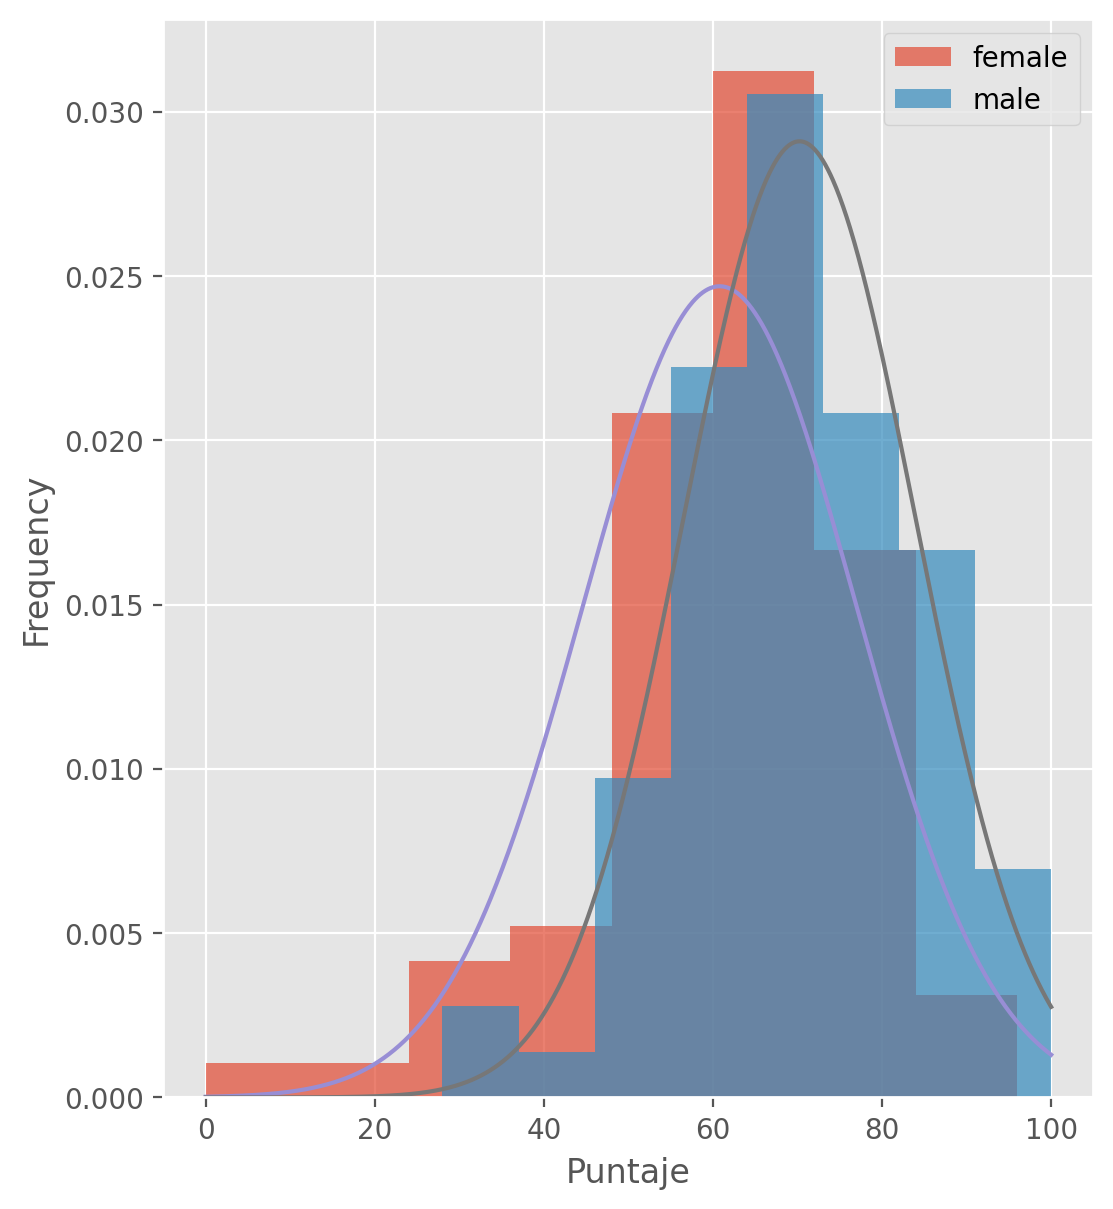

In [ ]:
## Ejemplo: comparar las medias de "math score" de acuerdo a "gender"
## Cada muestra debe ser de tamaño 80. Considerar alpha=0.05.
from scipy.stats import norm
import matplotlib.pyplot as plt

data_f = data.query("gender == 'female'")
data_m = data.query("gender == 'male'")

np.random.seed(2023)
muestra_f = data_f["math score"].sample(80)
muestra_m = data_m["math score"].sample(80)

media_muestra_f = muestra_f.mean()
media_muestra_m = muestra_m.mean()
desv_muestra_f = muestra_f.std()
desv_muestra_m = muestra_m.std()

x = [valor / 10 for valor in range(1001)]
y_f = norm(loc=media_muestra_f, scale=desv_muestra_f).pdf(x)
y_m = norm(loc=media_muestra_m, scale=desv_muestra_m).pdf(x)

fig, ax = plt.subplots()
muestra_f.plot(kind="hist", bins=8, alpha=0.7, density=True, ax=ax)
muestra_m.plot(kind="hist", bins=8, alpha=0.7, density=True, ax=ax)
ax.plot(x, y_f)
ax.plot(x, y_m)
plt.xlabel("Puntaje")
plt.legend(["female", "male"]);

* Ahora realizemos el test T:

In [ ]:
t_test(muestra_f, muestra_m)


    Welch's Two Sample t-test
    T = -3.9891 | df = 153.91 | p-value = 0.0001
    alternative hypothesis: true difference in means is not equal to 0
    95 percent confidence interval:
     -14.129887 -4.770113
    sample estimates:
      [mean of x, mean of y]: [60.7875, 70.2375]
    

Como el $\text{valor-p}=0.0001$, hay una discordancia entre los datos de la muestra y la hipótesis nula, por lo que se rechaza $H_0$. Por lo tanto, hay evidencia hacia que la media de los puntajes de "female" es distinta a la de "male".

<a id="ejercicios-de-practica"></a>
### Ejercicios de práctica

En los siguientes ejercicios estudiaremos distintas hipótesis, para ello usaremos una muestra de tamaño 350 de la *Encuesta Nacional de Salud* disponible en el archivo `ENS_reducida.xlsx`. En todos los ejercicios debe chequear si es correcto atribuir una distribución normal a los datos. Además, use un nivel de confianza al 95% o un nivel de significancia $\alpha=0.05$ cuando sea necesario y concluya de acuerdo al contexto del estudio.

1. Cargue la base de datos, realice un análisis inicial de datos que incluya un gráfico de relaciones de a pares y otro con la correlación lineal entre cada par de variables cuantitativas. Indique las tres asociaciones más fuertes y las tres asociaciones más débiles.

In [ ]:
!wget https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/ENS_reducida.xlsx

--2023-10-18 21:12:00--  https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/ENS_reducida.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50896 (50K) [application/octet-stream]
Saving to: ‘ENS_reducida.xlsx’

ENS_reducida.xlsx   100%[===================>]  49.70K  --.-KB/s    in 0.006s  

2023-10-18 21:12:01 (7.89 MB/s) - ‘ENS_reducida.xlsx’ saved [50896/50896]



In [ ]:
# Responda aquí:
# ES NORMAL QUE DEMORE UN POCO


2. Estudie si la media de HDL a nivel poblacional es distinta a 50. ¿Que relación existe entre el valor-p y el intervalo de confianza?

In [ ]:
# Responda aquí:


3. Estudie si la media poblacional de edad es menor a 45 años.

In [ ]:
# Responda aquí:

4. Finalmente, estudie si el IMC promedio es distinto a nivel poblacional entre el sexo femenino y masculino.

In [ ]:
# Responda aquí: